# 🏡 House Price Prediction Project
### End-to-End ML Workflow for Regression Task
Dataset: Kaggle House Prices — Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('/Users/donald/Desktop/AI PROJECT/Housing/train (1).csv')
test_df = pd.read_csv('/Users/donald/Desktop/AI PROJECT/Housing/test (1).csv')
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)
train_df.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
y = train_df['SalePrice']
X = train_df.drop(['SalePrice', 'Id'], axis=1)
test_ids = test_df['Id']
test_df = test_df.drop(['Id'], axis=1)
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)])

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_model = Pipeline([('preprocess', preprocessor), ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))])
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_valid)
print('MAE:', mean_absolute_error(y_valid, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_valid, y_pred)))
print('R2:', r2_score(y_valid, y_pred))

MAE: 17412.834349315064
RMSE: 28512.64567752048
R2: 0.8940109010265991


In [6]:
test_predictions = rf_model.predict(test_df)
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,128171.165
1,1462,152918.875
2,1463,178716.000
3,1464,184652.675
4,1465,205193.500


1️⃣ EDA Visualizations

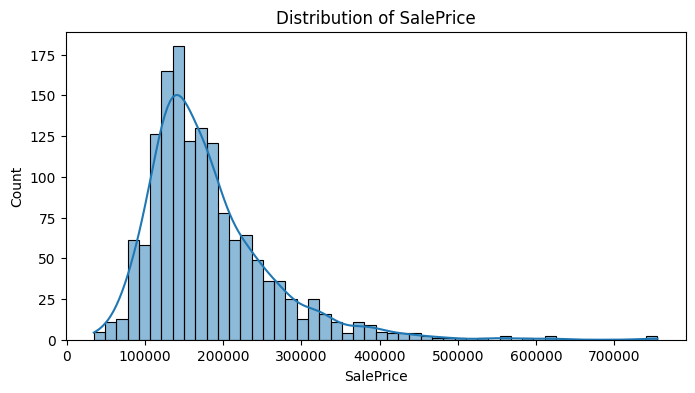

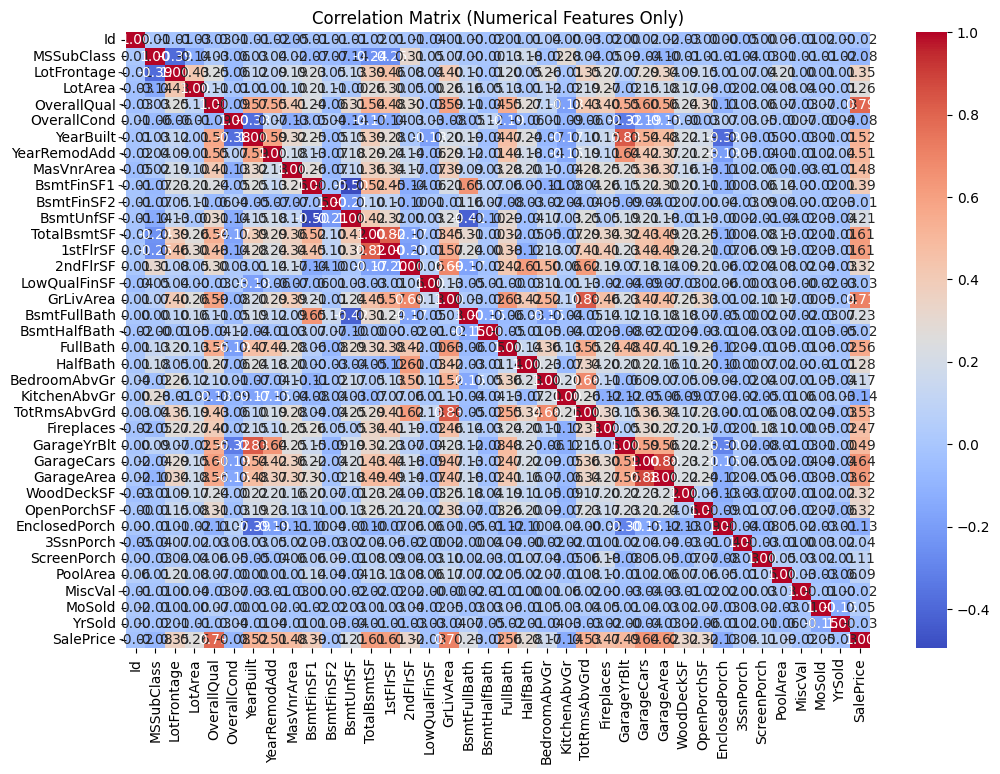

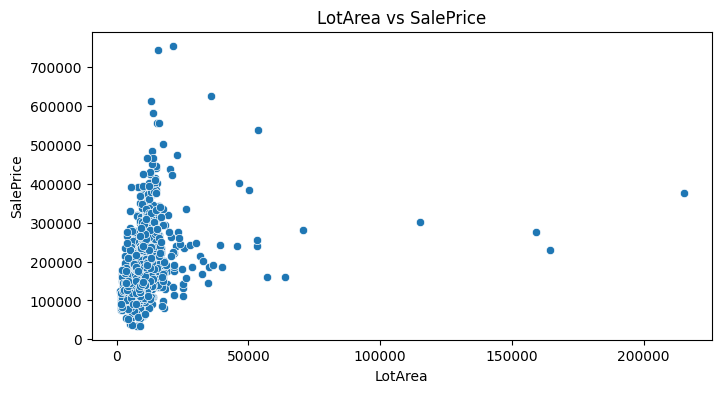

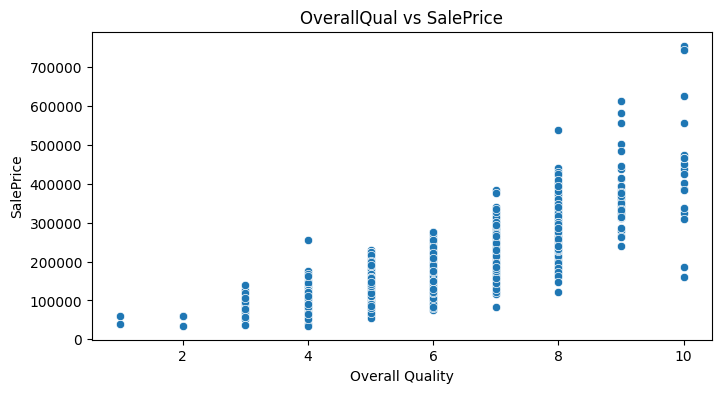

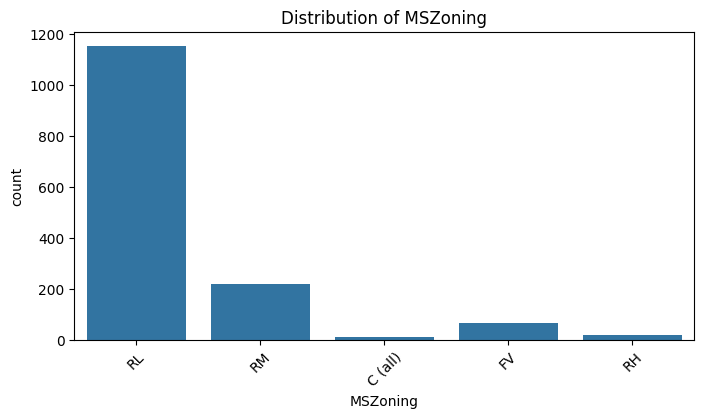

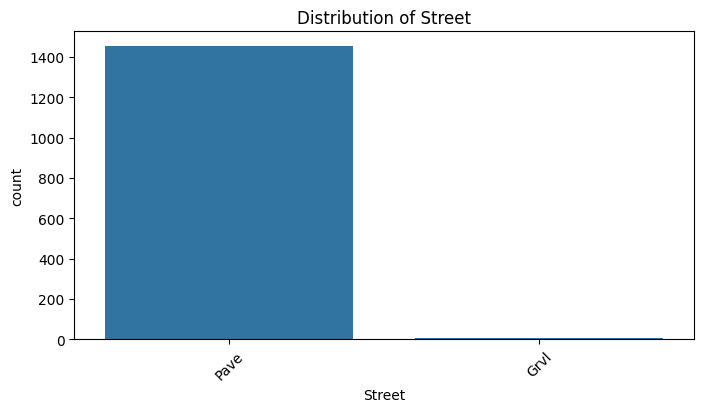

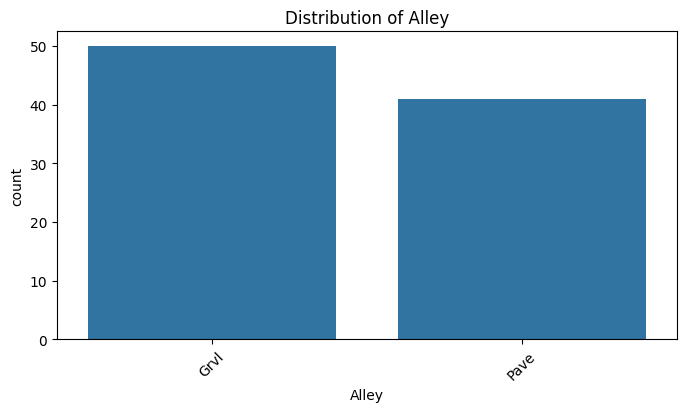

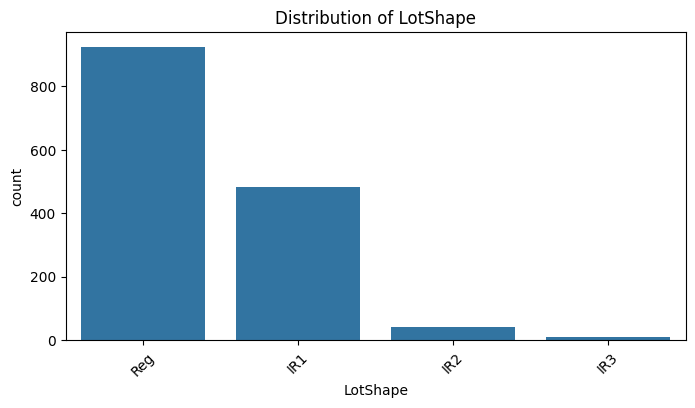

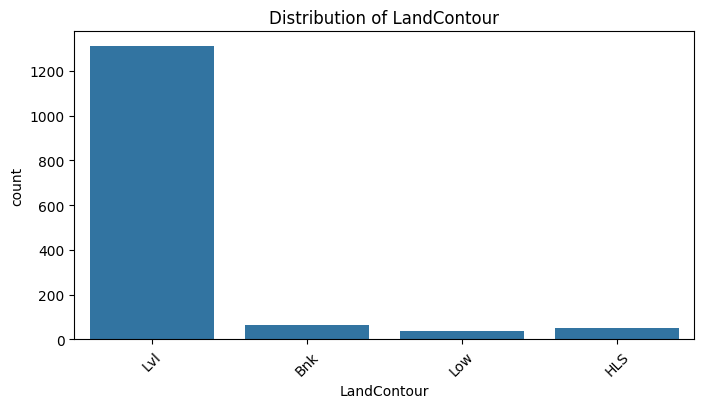

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ SalePrice distribution
plt.figure(figsize=(8,4))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# -------------------------
# 2️⃣ Numerical features correlation
num_features = train_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(num_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

# -------------------------
# 3️⃣ Scatter plot examples
plt.figure(figsize=(8,4))
sns.scatterplot(x='LotArea', y='SalePrice', data=train_df)
plt.title("LotArea vs SalePrice")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title("OverallQual vs SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

# -------------------------
# 4️⃣ Countplots for categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=train_df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
Hyperparameter Tuning with GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, None],
    'regressor__learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)



Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best CV R²: 0.8804207033530066
